1.Загрузите данные со страницы и отобразите из на своей   
1) Загрузите средствами Pandas таблицу с данными о погоде со страницы   
http://weatherarchive.ru/Temperature/Moscow/September-2022

2)      Создайте web-страницу и отобразите её на своем персональном web-сервере, на которой должно быть расположено:

1. Таблица в ее исходном виде – параметры погоды за месяц

2. График изменения температуры

3. График изменения атмосферного давления

4. Столбчатая диаграмма оранжевого цвета с показателями влажности (выберите нужный размер итогового изображения)

In [41]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Загрузка всех таблиц со страницы

df_t = pd.read_html('http://weatherarchive.ru/Temperature/Moscow/September-2022', encoding='utf-8')
len(df_t) # Число таблиц на сайте

df_wheater = df_t[2] # Нужная мне таблица в виде df

In [43]:
# Таблица в ее исходном виде – параметры погоды за месяц
df_wheater.columns = ["День месяца", "Среднесуточная температура", "Средняя влажность", "Атмосферное давление", "Скорость ветра"]
df_wheater

,День месяца,Среднесуточная температура,Средняя влажность,Атмосферное давление,Скорость ветра
0,1 сентября,+9.58°C,68.13%,744,4 м/с
1,2 сентября,+7.59°C,71.75%,748,4 м/с
2,3 сентября,+7.19°C,67.50%,753,3 м/с
3,4 сентября,+7.91°C,65.50%,753,2 м/с
4,5 сентября,+6.41°C,82.38%,752,3 м/с
5,6 сентября,+7.24°C,76.13%,751,3 м/с
6,7 сентября,+5.13°C,79.13%,747,3 м/с
7,8 сентября,+7.41°C,82.50%,750,3 м/с
8,9 сентября,+6.75°C,70.88%,756,2 м/с
9,10 сентября,+6.89°C,66.00%,757,1 м/с


In [44]:
# Запись таблицы в файл формата HTML

# Указать путь до места, где необходимо сохранить таблицу # ../app/static/
df_wheater.to_html('table.html', index=False) 

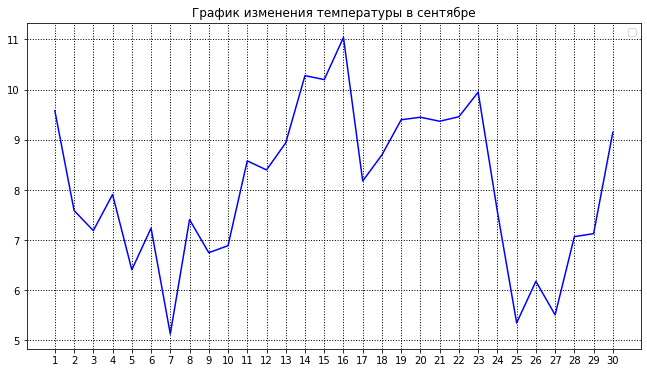

In [45]:
# -- Сделаю график изменения температуры. Сохраню его в .png

dates = list(df_wheater['День месяца'])
dates = [d.split(' ')[0] for d in dates]

temperature = list(df_wheater['Среднесуточная температура'])
temperature = [float(t[1:-2]) for t in temperature]

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

# Наносим надписи
ax.set_title("График изменения температуры в сентябре")

# Включаем отображение сетки
ax.grid(color = 'black',   #  цвет линий
        linewidth = 1,       #  толщина
        linestyle = ':')     #  начертание

# Отрисовываем график линейной зависимости
ax.plot(dates, temperature, color='blue')
ax.legend()

# Сохранение в png
plt.savefig('temperature_change.png')

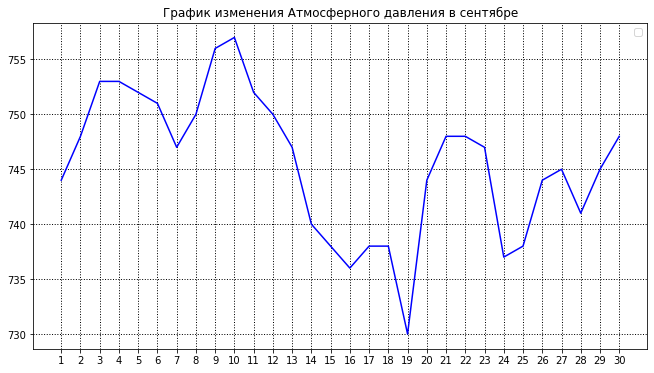

In [46]:
# -- Сделаю график изменения атм. давления. Сохраняю его в .png
pressure = list(df_wheater['Атмосферное давление'])

fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot()

# Наносим надписи
ax.set_title("График изменения Атмосферного давления в сентябре")

# Включаем отображение сетки
ax.grid(color = 'black',   #  цвет линий
        linewidth = 1,       #  толщина
        linestyle = ':')     #  начертание

# Отрисовываем график линейной зависимости
ax.plot(dates, pressure, color='blue')
ax.legend()

# Сохранение в png
plt.savefig('pressure_change.png')

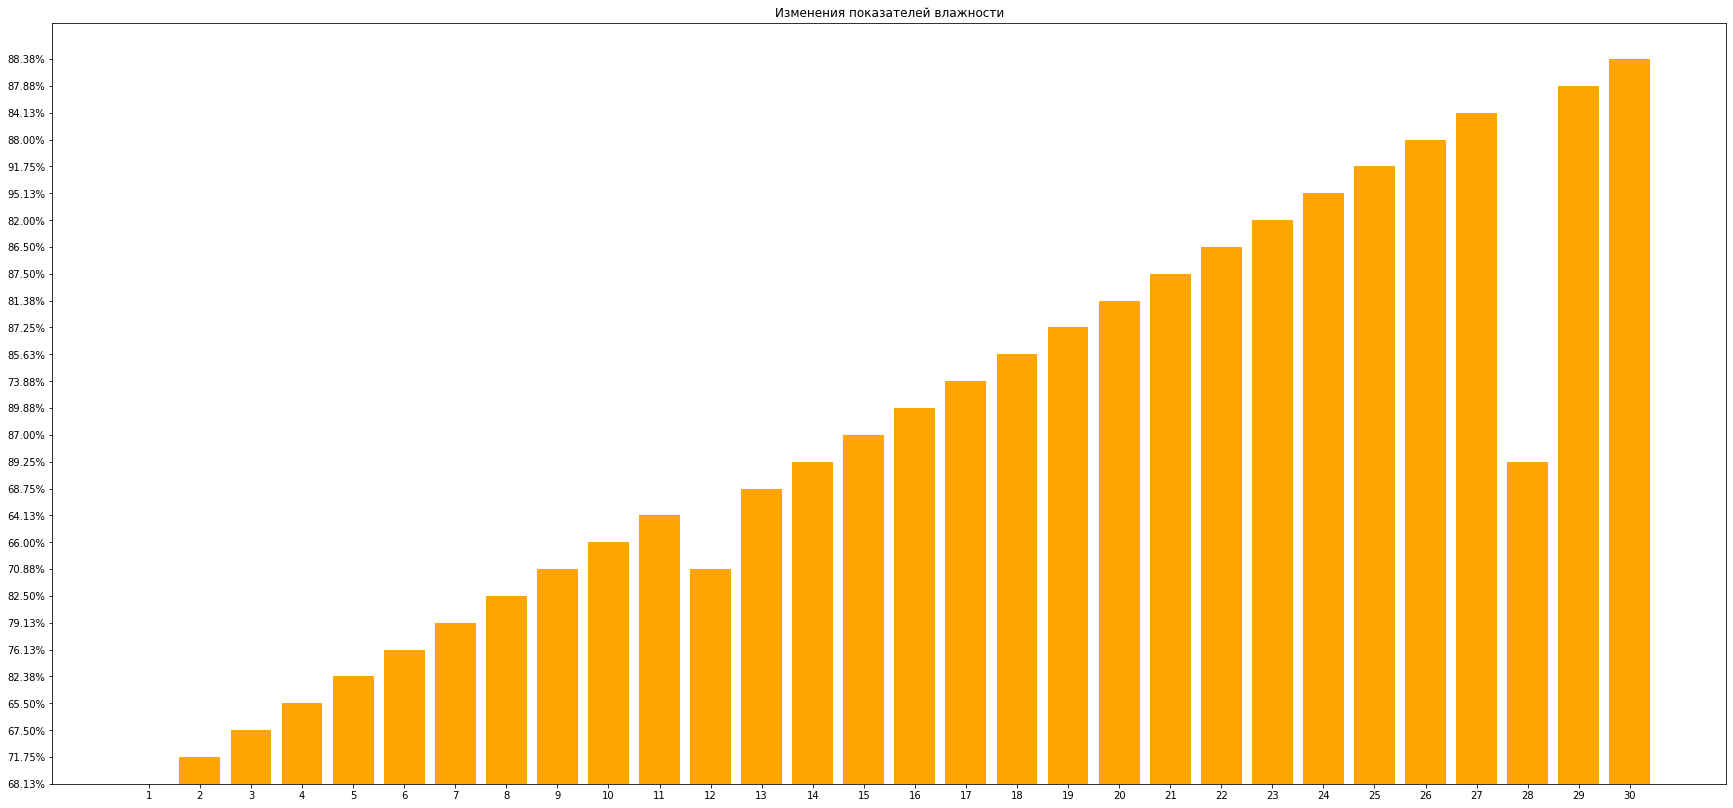

In [47]:
# Сделаю столбч. диаграмму оранжевого цвета с показателями влажности. Сохраняю её в .png  -  

wet = list(df_wheater['Средняя влажность'])

plt.figure(figsize=(30, 14))


# Наносим надписи
plt.title("Изменения показателей влажности")
plt.rcParams['font.size'] = '30' # Размер шрифта

# Стандартная столбчатая диаграмма
plt.bar(dates, wet, color='orange')

# Сохранение в png
plt.savefig('wet_change.png')